In [52]:
#Aluna: Tanizia de Lira Fagundes - 21754445

import numpy as np
import random
import matplotlib.pyplot as plt

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria aora 
        self.chegada = 0
        self.Tresposta = 0

    def roda(self,quantum): #quantum=None, rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(self.tam<quantum):  #quantum is None or só é necessario para o fifo
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    
class RoundRobin(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero

    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        self.prontos.append(Processo)

    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        if(len(self.prontos)==0):    #len retorna o numero de itens de uma lista
            return None              #isso faz com que não retorne erro ao finalizar os processos
        p = self.prontos[0]
        del self.prontos[0]
        return p   
    


A  rodou por  2  timeslice, faltam  1
B  rodou por  2  timeslice, faltam  1
C  rodou por  2  timeslice, faltam  1
D  rodou por  2  timeslice, faltam  1
A  rodou por  1  timeslice, faltam  0
B  rodou por  1  timeslice, faltam  0
C  rodou por  1  timeslice, faltam  0
D  rodou por  1  timeslice, faltam  0
teste


Text(0.5, 0.98, 'Grafico 2: Quantum relacionado ao aumento de tempo de resposta')

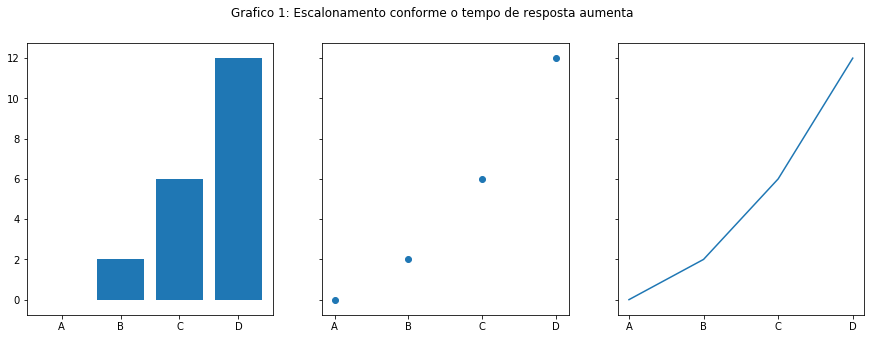

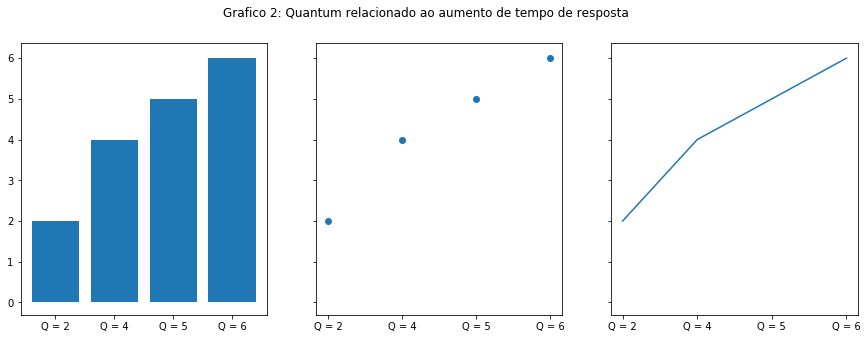

In [89]:
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([3,3,3,3])
total = tamanho.sum()
procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos
quantum = 2
tempoBloq = 1

escalonador = fifo(procs) #troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0

random.seed(0)


while total>0:
    p = escalonador.proximo()
    
    if(p is not None):
        rodou = p.roda(quantum) # ,_ adicione quantum como parâmetro, por enquanto nao temos E/S
        if(p.tam>0):
            escalonador.pronto(p)
        total-=rodou[0]     #primeira possição pois o retorno de rodou é [int,booleano
        tempo+=rodou[0]
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
        
        
print("teste")

#criando graficos

data = {'A': 0,'B': 2,'C': 4+2,'D': 6+6}
names = list(data.keys())
values =list(data.values())

fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Grafico 1: Escalonamento conforme o tempo de resposta aumenta')


data = {'Q = 2': 2,'Q = 4': 4,'Q = 5': 5,'Q = 6': 6}
names = list(data.keys())
values =list(data.values())

fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Grafico 2: Quantum relacionado ao aumento de tempo de resposta')



